## Análisis Descriptivo

In [ ]:
# Librerías
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def obtener_datos_pokemons(inicio, fin=None):
    if fin is None:
        fin = inicio
    lista_pok = []

    for num in range(inicio, fin + 1):
        response = requests.get(url=f"https://pokeapi.co/api/v2/pokemon/{num}/")
        if response.status_code == 200:
            data = response.json()
            
            dic_pok = {
                'id': data['id'],
                'name': data['name'],
                'height': data['height'],
                'weight': data['weight']
            }
            
            for idx, type_info in enumerate(data['types']):
                dic_pok[f'type_{idx + 1}'] = type_info['type']['name']
            
            for stat_info in data['stats']:
                dic_pok[stat_info['stat']['name']] = stat_info['base_stat']
            
            lista_pok.append(dic_pok)

    return pd.DataFrame(lista_pok)

df_pokemon = obtener_datos_pokemons(1,151)


In [ ]:
df_pokemon.head()

In [ ]:
df_pokemon.to_parquet('poke.parquet', index=False)

## Análisis de datos.

1. Definir el Problema
    - Objetivos
2. Recolección de Datos
    - Fuentes de datos
3. Análisis Descriptivo
    - Estadísticas Descriptivas
    - Visualizaciones de las variables (UniVariante)
4. Limpieza de los Datos
    - Calidad de los datos --> NaNs, outliers...
5. Análisis Exploratorio
    - Visualizaciones de variables (BiVariantes, MultiVariantes)
    - Correlaciones
6. Análisis Inferencial
    - Pruebas Estadísticas
7. ....
8. ....
9. Interpretación de los Resultados
    - Insight
    - Conclusiones
10. Toma de decisiones

# Análisis Descriptivo

- Realizar estadísticas descriptivas básicas para obtener una visión general de los datos.
- Identificar tipos de datos y reconocer patrones y anomalías evidentes.

Pasos para el análisis descriptivo:

1. Hacer una copia de df (dataframe)
2. Revisar el head y tail de df
3. Revisar la info
4. Revisar los missing
5. Hacer una tabla con los tipos de datos, clasificación de datos, cardinalidad, % missing, de cada variable
6. Revisar los outliers
7. Tipo de distribución 
8. Gráficos
    - Histogramas
    - Boxplot
    - Densidad 

# Librerías

In [1]:
# Análisis
import numpy as np
import pandas as pd
from scipy import stats

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# setup
sns.set_palette('husl')

# Carga de datos

In [2]:
df = pd.read_parquet('poke.parquet')
df.head()

,id,name,height,weight,type_1,type_2,hp,attack,defense,special-attack,special-defense,speed
0,1,bulbasaur,7,69,grass,poison,45,49,49,65,65,45
1,2,ivysaur,10,130,grass,poison,60,62,63,80,80,60
2,3,venusaur,20,1000,grass,poison,80,82,83,100,100,80
3,4,charmander,6,85,fire,None,39,52,43,60,50,65
4,5,charmeleon,11,190,fire,None,58,64,58,80,65,80


# Primera Exploración

In [3]:
df.head()

,id,name,height,weight,type_1,type_2,hp,attack,defense,special-attack,special-defense,speed
0,1,bulbasaur,7,69,grass,poison,45,49,49,65,65,45
1,2,ivysaur,10,130,grass,poison,60,62,63,80,80,60
2,3,venusaur,20,1000,grass,poison,80,82,83,100,100,80
3,4,charmander,6,85,fire,None,39,52,43,60,50,65
4,5,charmeleon,11,190,fire,None,58,64,58,80,65,80


In [4]:
df.tail()

,id,name,height,weight,type_1,type_2,hp,attack,defense,special-attack,special-defense,speed
146,147,dratini,18,33,dragon,None,41,64,45,50,50,50
147,148,dragonair,40,165,dragon,None,61,84,65,70,70,70
148,149,dragonite,22,2100,dragon,flying,91,134,95,100,100,80
149,150,mewtwo,20,1220,psychic,None,106,110,90,154,90,130
150,151,mew,4,40,psychic,None,100,100,100,100,100,100


In [5]:
df.shape

(151, 12)

El dataframe consta de 151 filas y 12 columnas, los datos pertenecen a Pokemon incluyen el nombre, el peso, la altura, los tipos y las estadísticas de cada uno

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               151 non-null    int64 
 1   name             151 non-null    object
 2   height           151 non-null    int64 
 3   weight           151 non-null    int64 
 4   type_1           151 non-null    object
 5   type_2           67 non-null     object
 6   hp               151 non-null    int64 
 7   attack           151 non-null    int64 
 8   defense          151 non-null    int64 
 9   special-attack   151 non-null    int64 
 10  special-defense  151 non-null    int64 
 11  speed            151 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 14.3+ KB


In [7]:
df.dtypes

id                  int64
name               object
height              int64
weight              int64
type_1             object
type_2             object
hp                  int64
attack              int64
defense             int64
special-attack      int64
special-defense     int64
speed               int64
dtype: object

Se observa que la mayoría de las variables son numéricas a excepción de name, type_1, type_2 que son del tipo object

In [8]:
nulos = pd.DataFrame(df.isnull().sum(), columns=['Conteo de nulos'])
nulos['porcentaje'] = (nulos['Conteo de nulos'] / len(df)) * 100
nulos

,Conteo de nulos,porcentaje
id,0,0.000000
name,0,0.000000
height,0,0.000000
weight,0,0.000000
type_1,0,0.000000
type_2,84,55.629139
hp,0,0.000000
attack,0,0.000000
defense,0,0.000000
special-attack,0,0.000000


la variable type_2 es la única que presenta nulos con 84 de ellos lo que representa el 55.63% de los datos.
posibles tratamientos:
- Eliminar la columna type_2
- Eliminar las filas donde type_2 sea NaN
- Imputarlo a la moda (es str)
- Feature Engineer de las dos columnas type_1 type_2 (concatenarlas)
- Imputar a 'NO TIENE'

Tabla.

|Columna|id| name| height| weight| type_1| type_2| hp| attack|defense| special-attack| special-defense| speed|
|---|---|---|---|---|---|---|---|---|---|---|---|---|
|Tipo de Datos|int|str|int|int|str|str|int|int|int|int|int|int|
|Tipo de Variable|Cuantitativo - Indice|Cualitativo - Nominal|Cuantitativo - Discreto|Cuantitativo - Discreto|Cualitativo - Nominal|Cualitativo - Nominal|Cuantitativo - Discreto|Cuantitativo - Discreto|Cuantitativo - Discreto|Cuantitativo - Discreto|Cuantitativo - Discreto|Cuantitativo - Discreto|Cuantitativo - Discreto|Cuantitativo - Discreto|
|% Cardinalidad|100|100|17.22|71.52|9.93|7.28|27.81|30.46|29.14|22.52|19.21|27.81|
|% missing|0|0|0|0|0|55.63|0|0|0|0|0|0|

Se observa que los datos id y name son de alta cardinalidad lo que indica que son unicos y no aportan informacion relevante, que existe una alta cantidad de nulos en type_2 y que type_1 y type_2 tienen pocos valores al igual en menor medida special-defense 

In [9]:
df.describe()

,id,height,weight,hp,attack,defense,special-attack,special-defense,speed
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,11.947020,459.516556,64.211921,72.913907,68.225166,67.139073,66.086093,69.066225
std,43.734045,9.626206,594.479883,28.590117,26.755421,26.916704,28.534199,24.208797,27.024598
min,1.000000,2.000000,1.000000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000
25%,38.500000,7.000000,99.000000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000
50%,76.000000,10.000000,300.000000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000
75%,113.500000,15.000000,562.500000,80.000000,92.000000,84.000000,87.500000,80.000000,90.000000
max,151.000000,88.000000,4600.000000,250.000000,134.000000,180.000000,154.000000,125.000000,150.000000


## Análisis univariante o univariado

id
count    151.000000
mean      76.000000
std       43.734045
min        1.000000
25%       38.500000
50%       76.000000
75%      113.500000
max      151.000000
Name: id, dtype: float64
moda 1
curtosis -1.2000000000000002
asimetria 0.0
varianza 1912.6666666666667


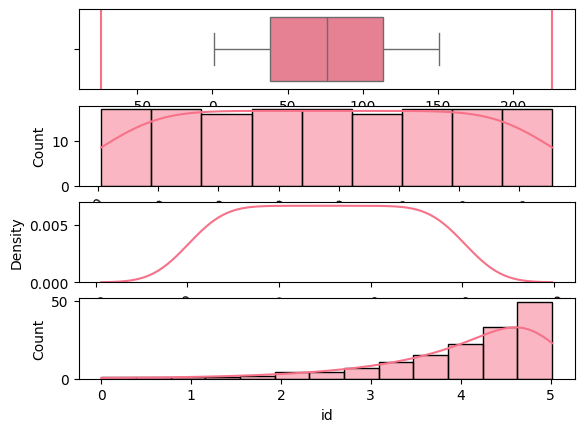

height
count    151.000000
mean      11.947020
std        9.626206
min        2.000000
25%        7.000000
50%       10.000000
75%       15.000000
max       88.000000
Name: height, dtype: float64
moda 10
curtosis 31.298396714845367
asimetria 4.660414838380009
varianza 92.66384105960263


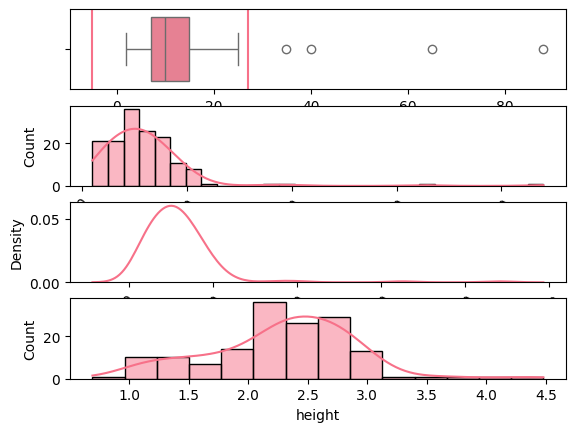

weight
count     151.000000
mean      459.516556
std       594.479883
min         1.000000
25%        99.000000
50%       300.000000
75%       562.500000
max      4600.000000
Name: weight, dtype: float64
moda 300
curtosis 17.92498201056994
asimetria 3.5500528020973556
varianza 353406.3313907284


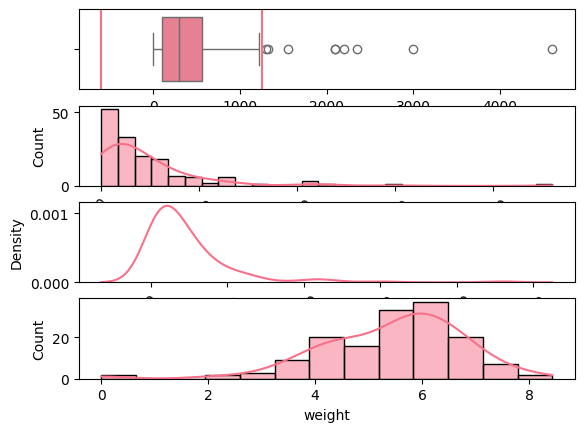

hp
count    151.000000
mean      64.211921
std       28.590117
min       10.000000
25%       45.000000
50%       60.000000
75%       80.000000
max      250.000000
Name: hp, dtype: float64
moda 65
curtosis 11.629922207409313
asimetria 2.306515307345483
varianza 817.3947902869756


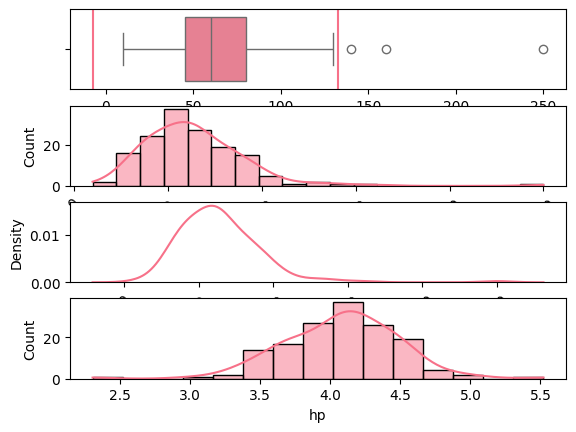

attack
count    151.000000
mean      72.913907
std       26.755421
min        5.000000
25%       51.000000
50%       70.000000
75%       92.000000
max      134.000000
Name: attack, dtype: float64
moda 45
curtosis -0.38850431934939067
asimetria 0.11465441836666468
varianza 715.8525386313465


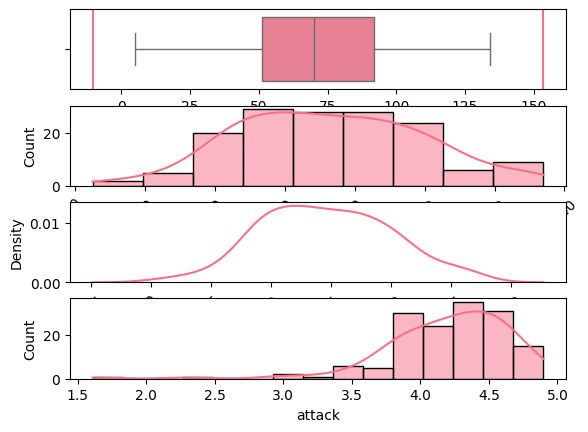

defense
count    151.000000
mean      68.225166
std       26.916704
min        5.000000
25%       50.000000
50%       65.000000
75%       84.000000
max      180.000000
Name: defense, dtype: float64
moda 65
curtosis 1.7583634883719546
asimetria 0.8387180056905257
varianza 724.5089624724063


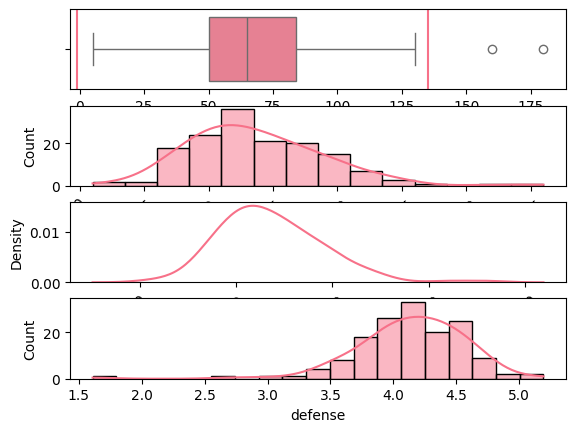

special-attack
count    151.000000
mean      67.139073
std       28.534199
min       15.000000
25%       45.000000
50%       65.000000
75%       87.500000
max      154.000000
Name: special-attack, dtype: float64
moda 50
curtosis -0.37332999241680787
asimetria 0.499756406343774
varianza 814.2005298013245


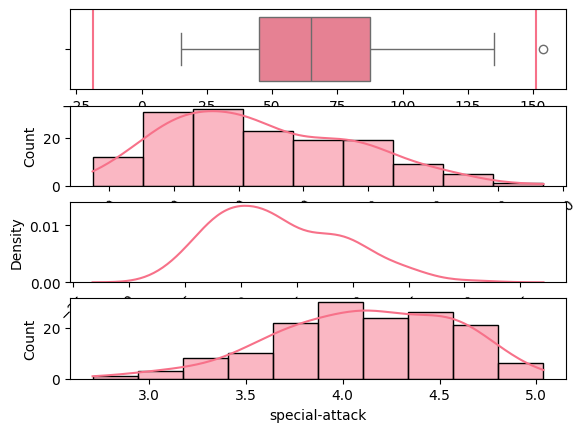

special-defense
count    151.000000
mean      66.086093
std       24.208797
min       20.000000
25%       49.000000
50%       65.000000
75%       80.000000
max      125.000000
Name: special-defense, dtype: float64
moda 80
curtosis -0.6123326892859362
asimetria 0.14141669726027903
varianza 586.0658719646799


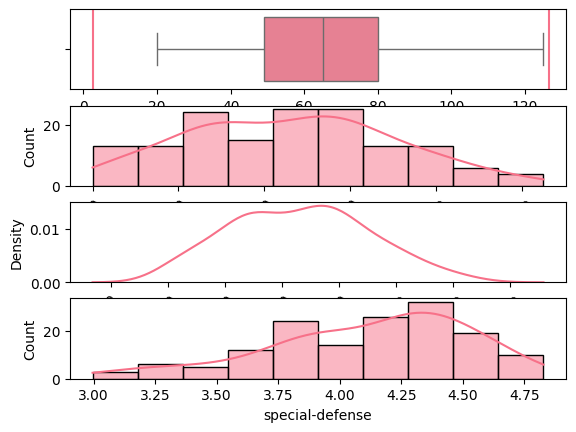

speed
count    151.000000
mean      69.066225
std       27.024598
min       15.000000
25%       46.500000
50%       70.000000
75%       90.000000
max      150.000000
Name: speed, dtype: float64
moda 70
curtosis -0.4070679570858968
asimetria 0.3065240535826977
varianza 730.3289183222957


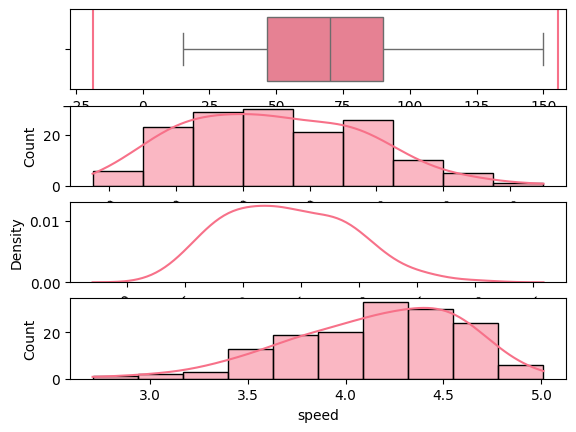

In [13]:
col_num = df.select_dtypes(include='number').columns

for col in col_num:
    print(col)
    print(df[col].describe())
    print('moda',df[col].mode()[0])
    print('curtosis',df[col].kurtosis())
    print('asimetria',df[col].skew())
    print('varianza',df[col].var())
    print('=='*80)
    plt.subplot(4, 1, 1) 
    sns.boxplot(df[col], orient='h')
    q1 = np.percentile(df[col],25)
    q3 = np.percentile(df[col],75)
    IQR = q3 - q1
    lim_inf = q1 - (1.5*IQR)
    lim_sup = q3 + (1.5*IQR) 
    plt.axvline(lim_inf)
    plt.axvline(lim_sup)
    # plt.annotate(text='wigglytuff',xy=(140,0.3))
    # plt.annotate(text='chansey',xy=(250,0.3))
    # plt.annotate(text='snorlax',xy=(160,0.1))
    plt.subplot(4, 1, 2) 
    # sns.countplot(df[col])
    sns.histplot(df[col],kde=True)
    plt.xticks(rotation=45)
    plt.subplot(4, 1, 3) 
    sns.kdeplot(df[col])
    plt.xticks(rotation=45)
    plt.subplot(4, 1, 4)
    sns.histplot(np.log(df[col]),kde=True)
    # plt.axvline(np.mean(np.log(df[col])), color='black')
    # plt.axvline(np.median(np.log(df[col])), color='black')
    # plt.axvline(np.log(65), color='black')
    plt.show()

In [40]:
df_tipos = df.pivot_table(
    index=col,
    values='id',
    aggfunc='count'
).sort_values('id',ascending=False)

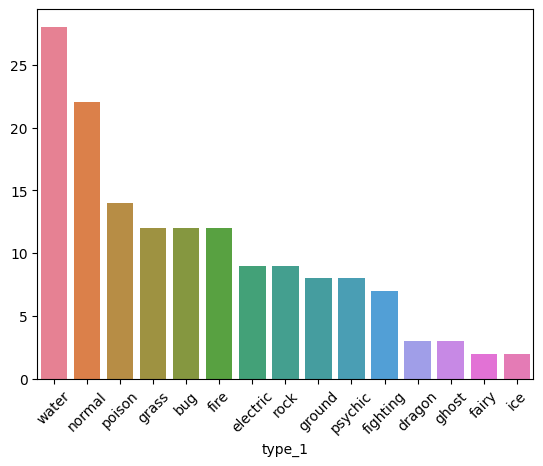

In [42]:
col = 'type_1'

if col == 'type_2':
    df.loc[:,col].fillna('NO TIENE', inplace=True)
df[col].describe(include='object')
sns.barplot(data=df_tipos.T)
plt.xticks(rotation=45);

## Análisis bivariante o bivariado

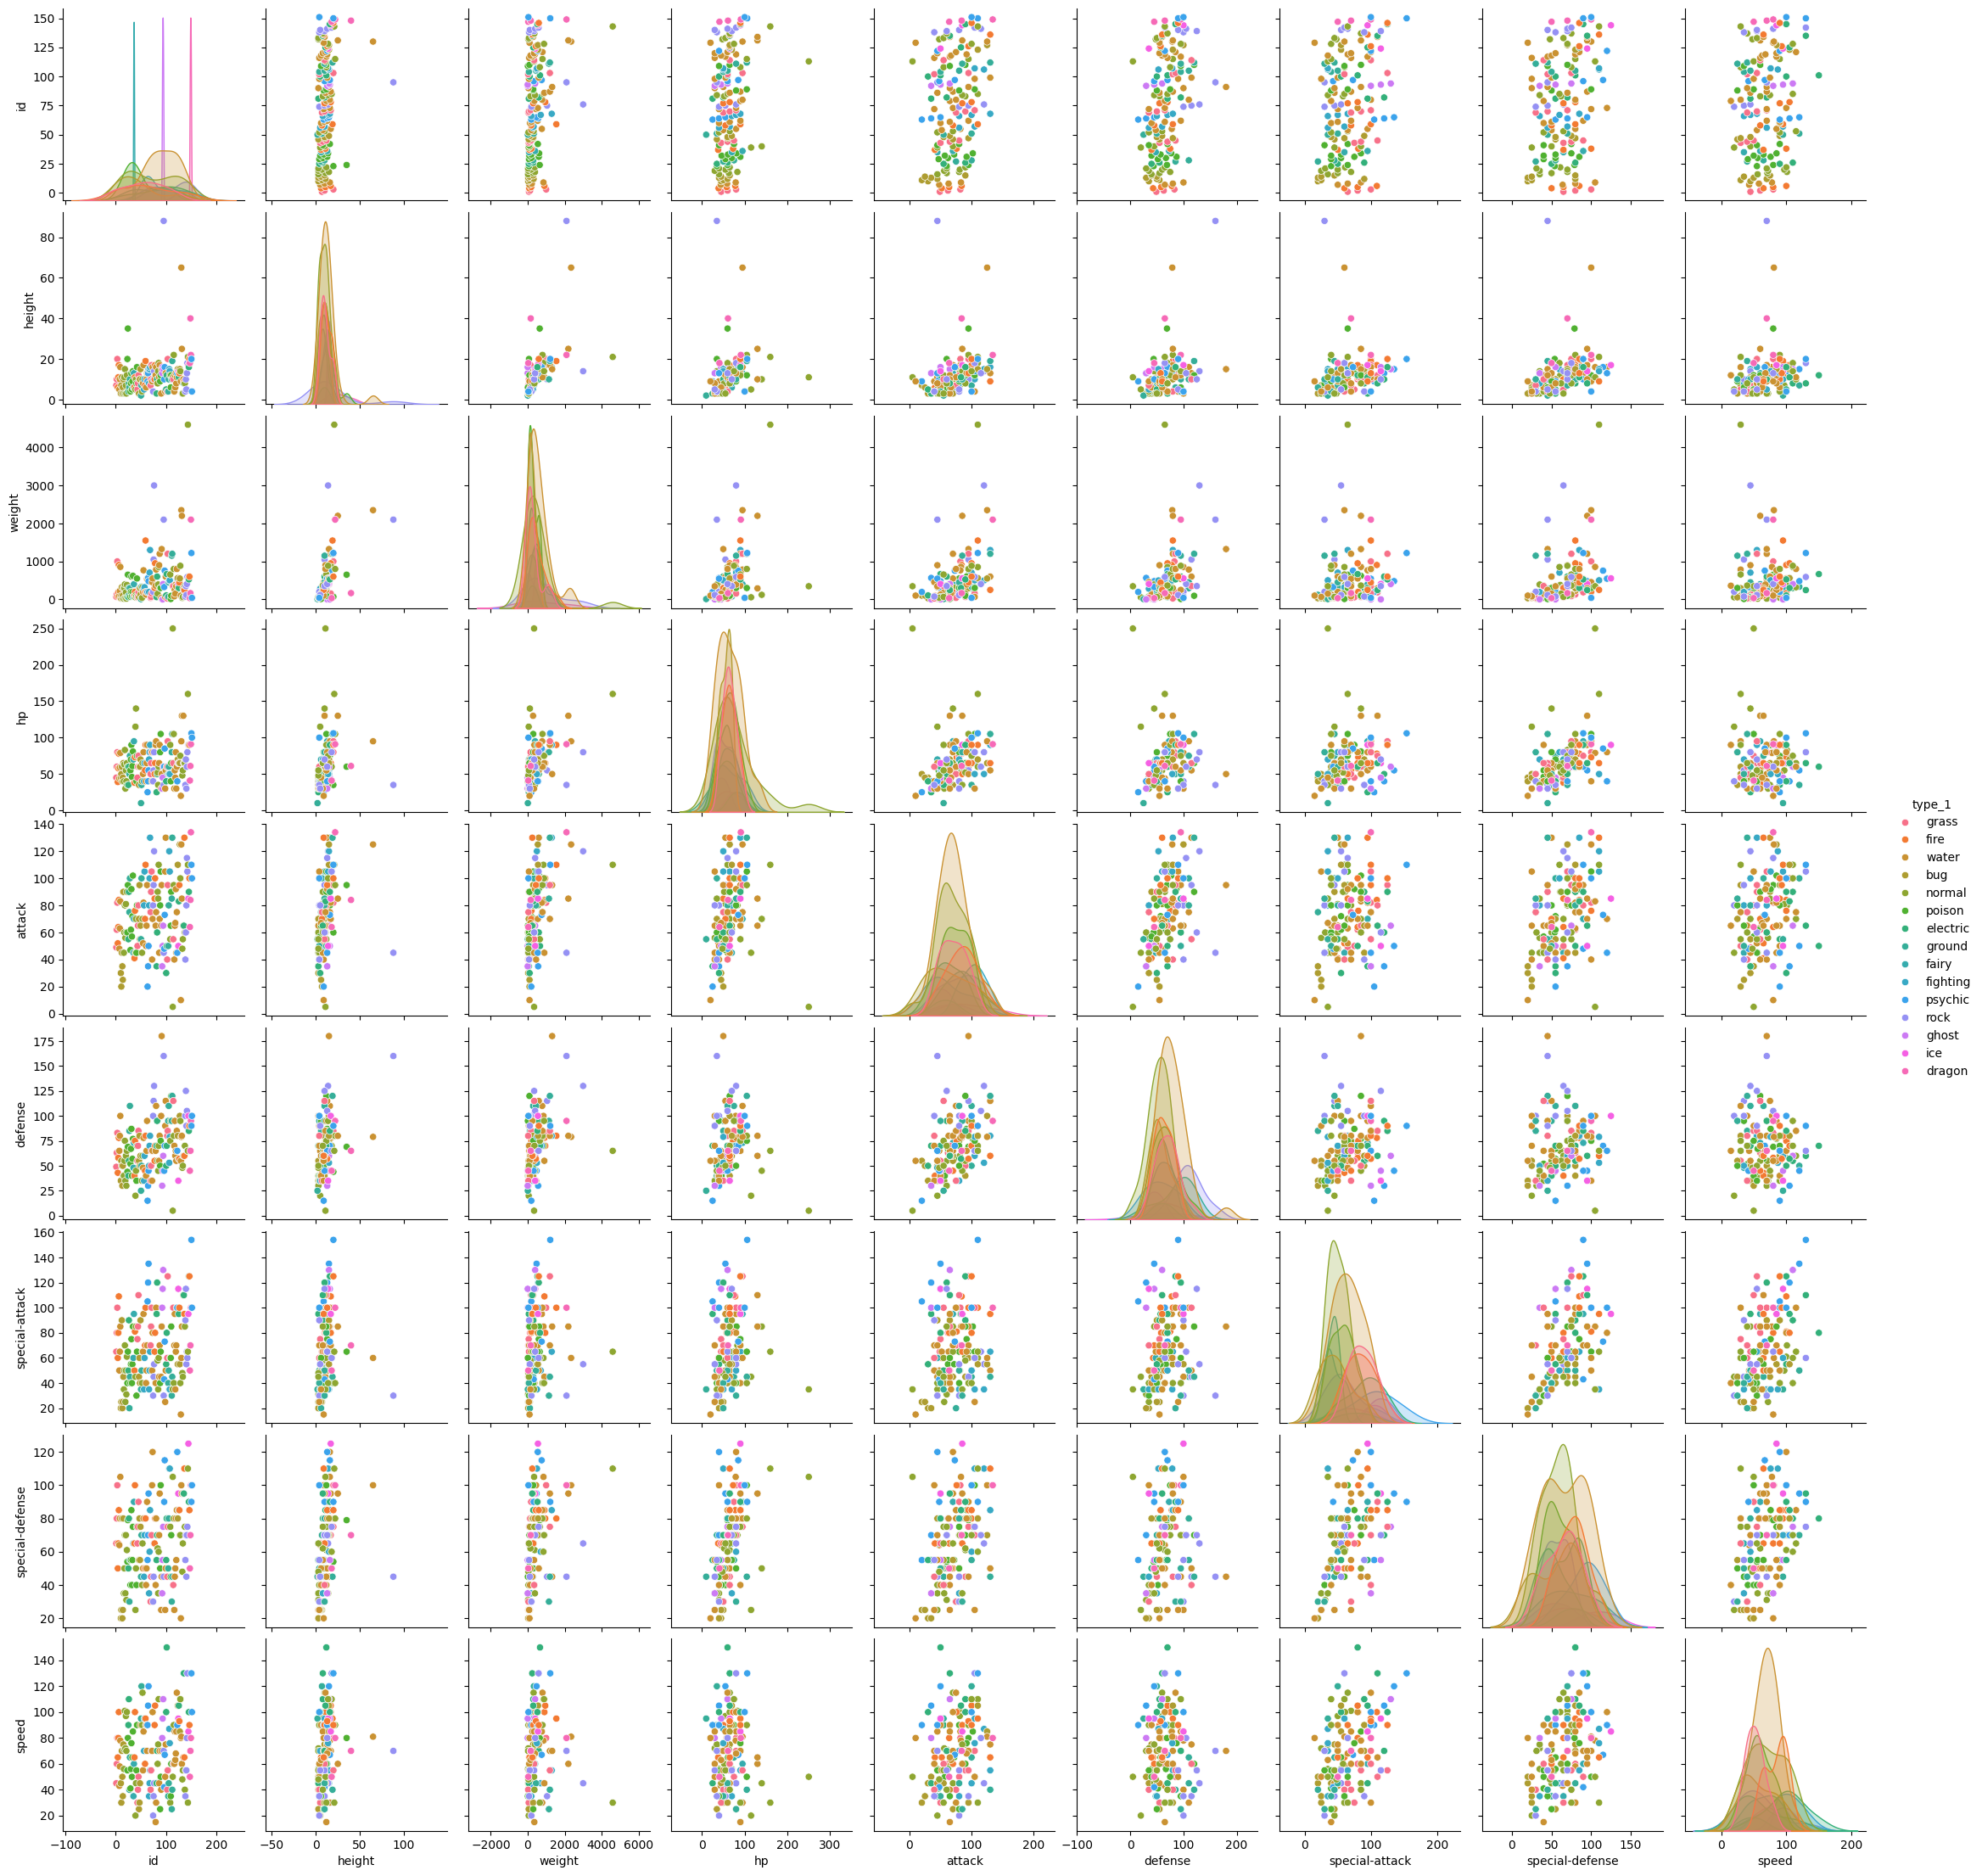

In [43]:
sns.pairplot(data=df,hue='type_1')

In [50]:
df['Total_Stats'] = df.iloc[:,-6:].sum(axis='columns')

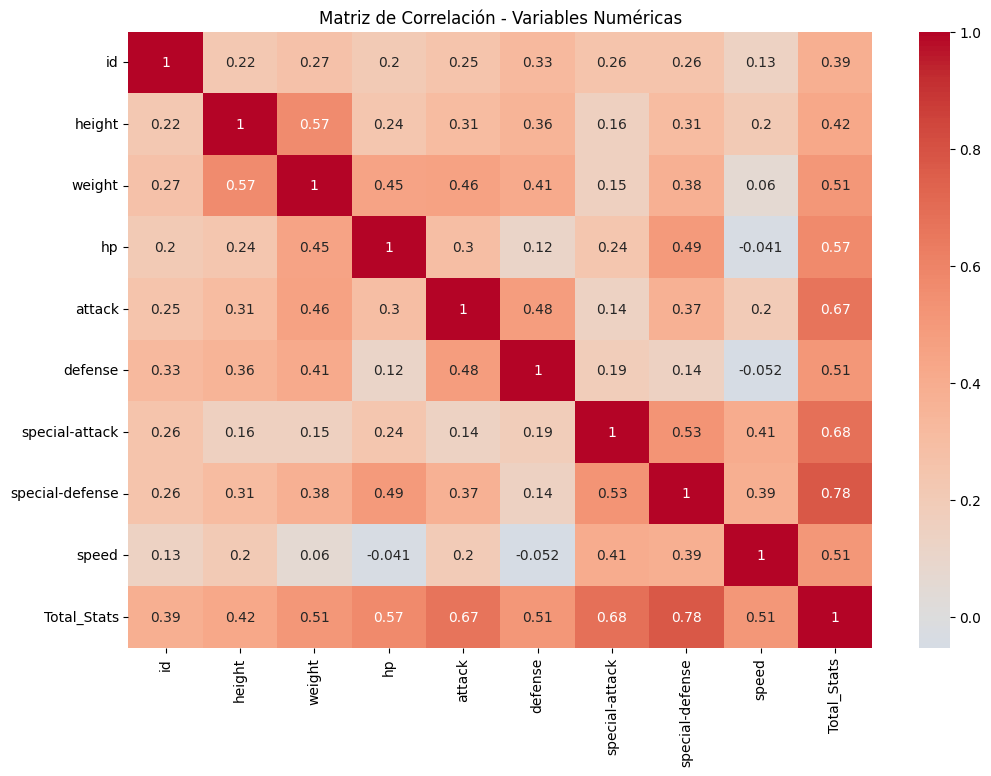

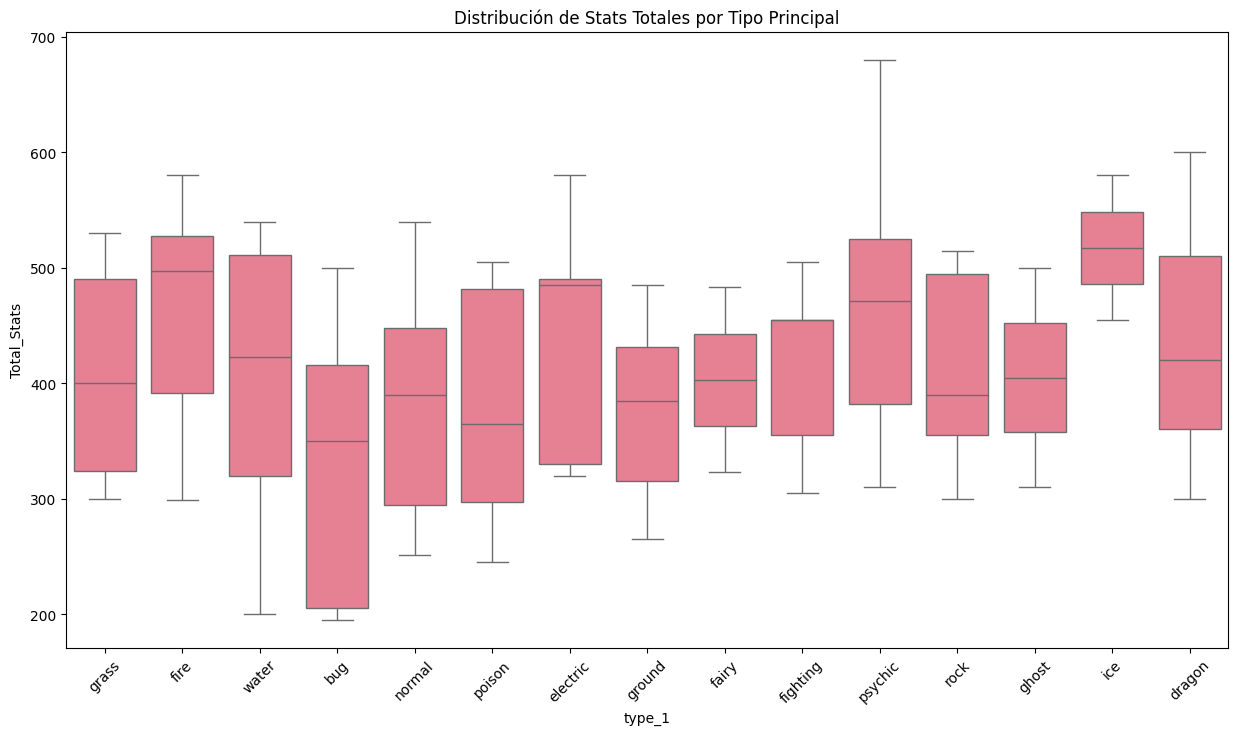

In [52]:
numeric_cols = df.select_dtypes(include='number').columns

# Correlación entre variables numéricas
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación - Variables Numéricas')
plt.show()

# Relación entre Type_1 y estadísticas
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='type_1', y='Total_Stats')
plt.xticks(rotation=45)
plt.title('Distribución de Stats Totales por Tipo Principal')
plt.show()

# # Relación entre Generation y estadísticas
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df, x='Generation', y='Total_Stats')
# plt.title('Evolución de Stats Totales por Generación')
# plt.show()